curve_fit
===============
**there is numpy.array there...**

With method='lm', the algorithm uses the Levenberg-Marquardt algorithm through leastsq. Note that this algorithm can only deal with unconstrained problems.

Box constraints can be handled by methods ‘trf’ and ‘dogbox’. Refer to the docstring of least_squares for more information. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

leastsq - this i try here
------------
“leastsq” is a wrapper around MINPACK’s lmdif and lmder algorithms.

cov_x is a Jacobian approximation to the Hessian of the least squares objective function. This approximation assumes that the objective function is based on the difference between some observed target data (ydata) and a (non-linear) function of the parameters f(xdata, params)
https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.leastsq.html

http://iminuit.readthedocs.io/en/latest/

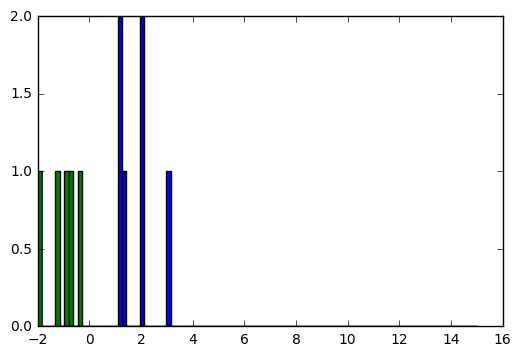

In [30]:
%matplotlib inline
import numpy as np
from scipy import optimize
import random
import matplotlib.pyplot as plt

# These are the true parameters
p0 = 1.0
p1 = 1.0
sigma=1.0
fasigma=sigma *1.0  #  points are dispersed more than 1sigma
totalpoints=6
#pd.Series(100)  #pandas
li=np.random.random(totalpoints)*3+1
ga=np.random.normal(0.,  fasigma , totalpoints)
plt.hist( li,  bins = np.linspace(-2.0, 15, 100))
plt.hist( ga,  bins = np.linspace(-2.0, 15, 100))
plt.show()
#hist=np.histogram(a,   bins=np.linspace(0,6,num=61) )
#hist


In [31]:
# These are initial guesses for fits:
p0=np.array([ 5.0, 2.0 ])
pr=np.array([ x+np.random.random()*0.2-0.1 for x in p0 ])
#print(p0,pr)
####### numpy.ndarray
def f(x,p0,p1):
    #print(x, type(x), p0, type(p0), p1, type(p1))
    return p0*x+p1
xvals = np.linspace(0., 1, totalpoints )
yvals = f(xvals, *p0 )
print(yvals)
yrand=np.array([ y+g for y,g in zip(yvals,ga) ])
dyrand=np.array([ sigma for x in xvals ])

[ 2.  3.  4.  5.  6.  7.]


In [32]:
#print(xvals )
#print('origo==',yrand, type(yrand) )
np.savetxt('data/outx.txt' ,xvals.view(float) )
np.savetxt('data/outy.txt' ,yrand.view(float) )
xvals = np.loadtxt('data/outx.txt').view(float)
yrand = np.loadtxt('data/outy.txt').view(float)
#print('read ==',yrand, type(yrand) )


In [33]:
print('real     values',p0)# Generate data with a bit of randomness
print('starting values',pr)# Generate data with a bit of randomness
## this bitch sends x as numpy.ndarray
##  it determines number of parameters from the function definition :/
pfit, pcov = optimize.curve_fit(f, xvals, yrand,  sigma=dyrand )
print('fitted values  ',pfit )
print(pcov)
xi2=( (f(xvals, *pfit )-yrand)**2).sum()
dnf=(len(yrand)-len(pfit))
print('        Xi2=',xi2," dnf=",dnf, " xi2/dnf=",xi2/dnf)
if (len(yrand) > len(pfit)) and pcov is not None:
    s_sq = xi2/dnf
    if (s_sq>1.0):
        print('... i MuLtIpLy by',s_sq)
        pcov = pcov * xi2/dnf      
    else:
        print('... i DONT multiply by normalized xi2',s_sq)
        #pcov = pcov * s_sq        
    from scipy.stats import chi2
    mean, var, skew, kurt = chi2.stats(df, moments='mvsk')
    print( 'Xi2 1sig =( ', chi2.ppf( 0.33, dnf),'...', chi2.ppf( 0.66, dnf) ,')' )
    print( 'Xi2 2sig=( ', chi2.ppf( 0.05, dnf),'...', chi2.ppf( 0.95, dnf) ,')' )
    print( 'Xi2 3sig=( ', chi2.ppf( 0.01, dnf),'...', chi2.ppf( 0.99, dnf) ,')' )
else:
    pcov = np.inf
error=[]
print(pcov)

real     values [ 5.  2.]
starting values [ 5.06917699  1.97227448]
fitted values   [ 6.61834746  0.04151104]
[[ 0.17568341 -0.0878417 ]
 [-0.0878417   0.06441722]]
        Xi2= 0.491913161568  dnf= 4  xi2/dnf= 0.122978290392
... i DONT multiply by normalized xi2 0.122978290392
Xi2 1sig =(  2.3592699933 ... 4.52154872659 )
Xi2 2sig=(  0.710723021397 ... 9.48772903678 )
Xi2 3sig=(  0.297109480507 ... 13.276704136 )
[[ 0.17568341 -0.0878417 ]
 [-0.0878417   0.06441722]]


fitted values   [ 6.61834746  0.04151104]
delta  values= [0.4191460500083411, 0.25380548269953301]


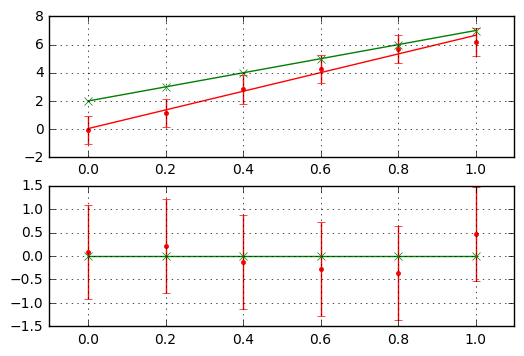

In [38]:
error=[]
for i in range(len(pfit)):
    try:
        error.append(np.absolute(pcov[i][i])**0.5)
    except:
        error.append( 0.00 )
print('fitted values  ',pfit )
print('delta  values=',error)

#plt.plot(xvals, yvals,'k. ')
plt.figure(1)
plt.subplot(211)

plt.plot(xvals, f(xvals,*pfit) ,"r")
plt.errorbar(xvals, yrand, fmt='r. ', yerr=dyrand)

plt.plot(xvals, f(xvals,*p0)   ,"gx-" ) # original theory
plt.grid()
x1,x2,y1,y2 = plt.axis()
plt.axis((x1-(x2-x1)*0.1,x2+(x2-x1)*0.1,y1  ,y2 ))
plt.subplot(212)
plt.plot(xvals, f(xvals,*p0)-yvals   ,"gx-" ) # original theory
plt.errorbar(xvals, f(xvals, *pfit)-yrand, fmt='r. ', yerr=dyrand)
#plt.tight_layout()
plt.grid()
x1,x2,y1,y2 = plt.axis()
plt.axis((x1-(x2-x1)*0.1,x2+(x2-x1)*0.1,y1  ,y2 ))
plt.show()



$\chi^2$ analysis
-------------

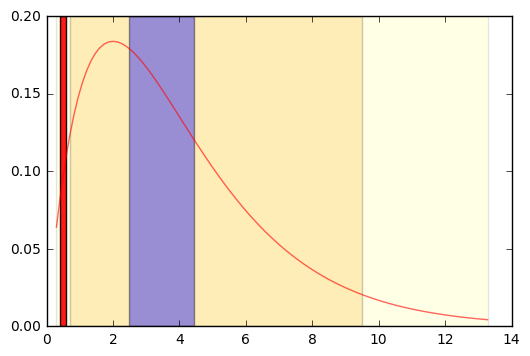

In [35]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
dnf = (len(yrand)-len(pfit))
mean, var, skew, kurt = chi2.stats(dnf, moments='mvsk')
x = np.linspace(chi2.ppf(0.01, dnf), chi2.ppf(0.99, dnf), 100)
plt.plot(x, chi2.pdf(x, df), 'r-', lw=1, alpha=0.6, label='chi2 pdf')
(lll,hhh)=( chi2.ppf( 0.01, dnf), chi2.ppf( 0.99, dnf) )
plt.axvspan( lll,hhh, ymin=0,ymax=1, facecolor='yellow', alpha=0.1)
(ll,hh)=( chi2.ppf( 0.05, dnf), chi2.ppf( 0.95, dnf) )
plt.axvspan( ll,hh, ymin=0,ymax=1, facecolor='orange', alpha=0.2)
(l,h)=( chi2.ppf( 0.35, dnf), chi2.ppf( 0.65, dnf) )
plt.axvspan( l,h, ymin=0,ymax=1, facecolor='blue', alpha=0.4)
(l,h)=( xi2-(hh-ll)/100 ,xi2+(hh-ll)/100)
plt.axvspan( l,h, ymin=0,ymax=1, facecolor='red', alpha=0.9)
plt.show()